<Figure size 800x800 with 0 Axes>

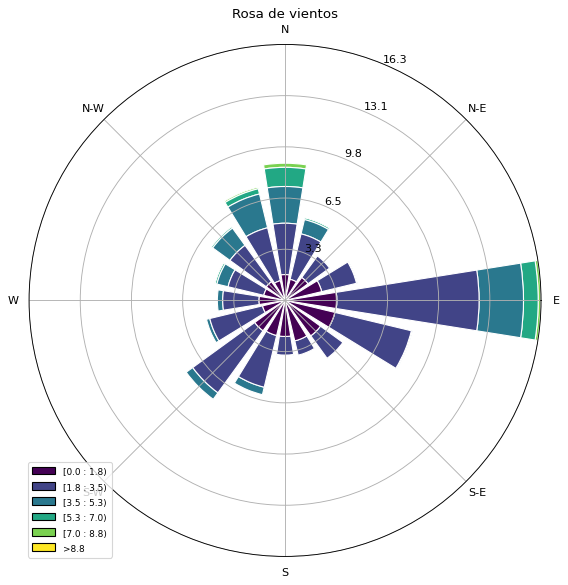

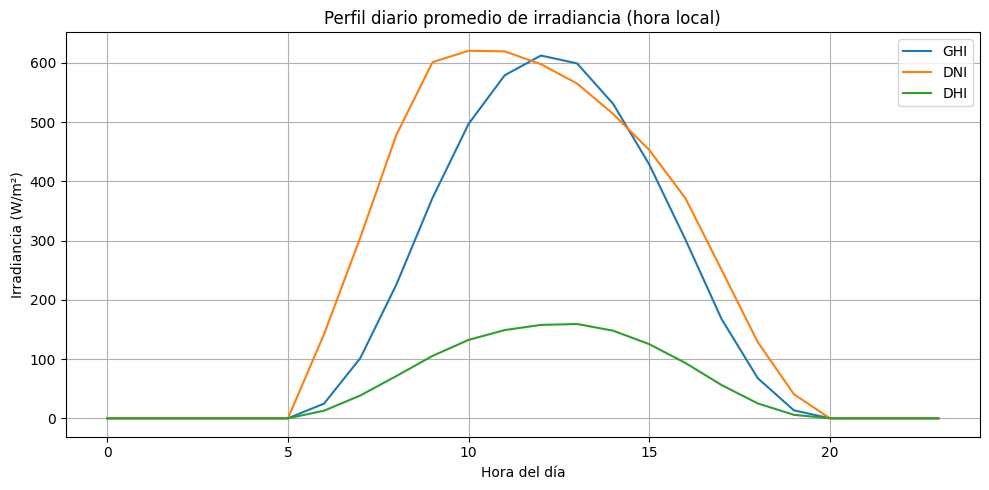

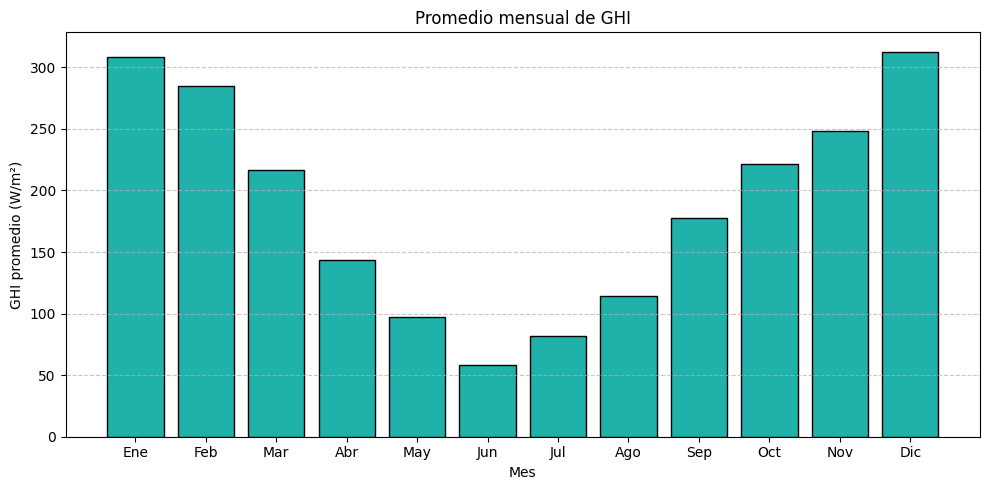

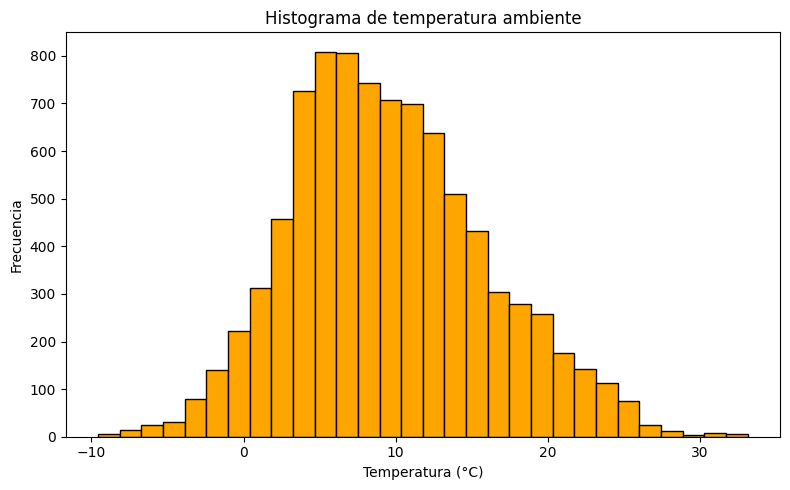

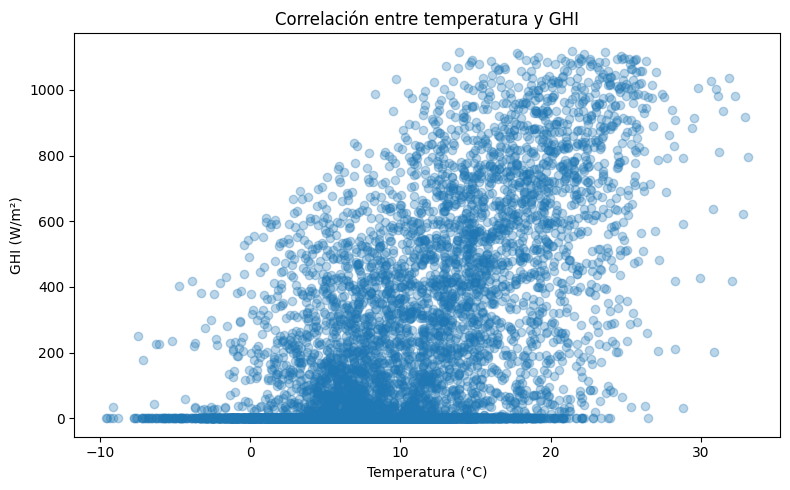

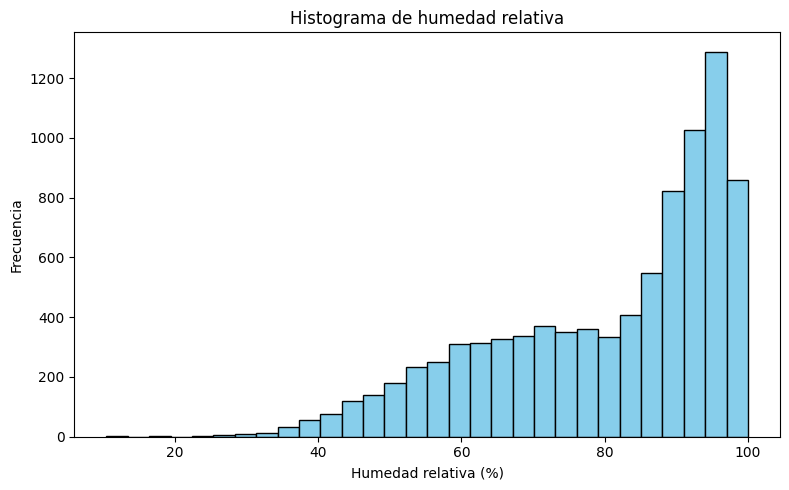

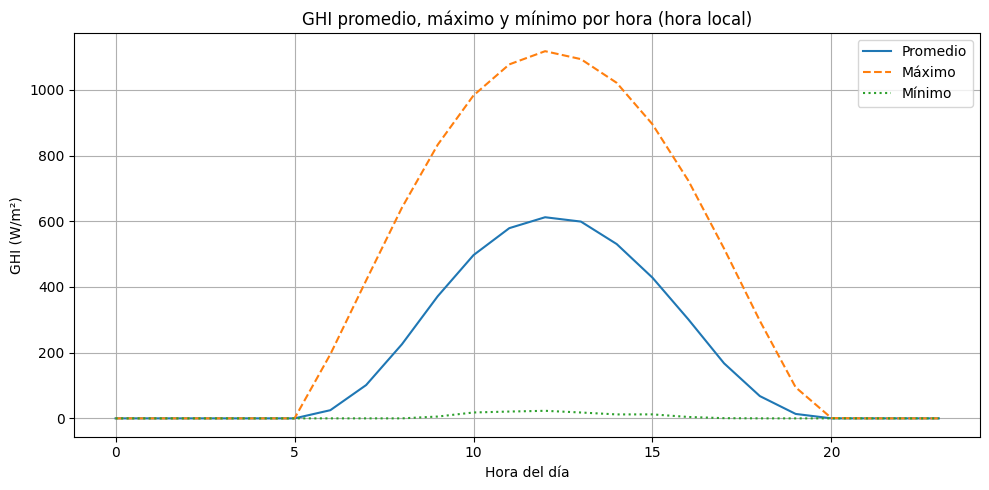

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from windrose import WindroseAxes

# === Parámetros ===
tmy_file = 'tmy_-38.320_-71.960_2005_2023_pvwatts_final.csv'
utc_offset = -4  # Varía según el país 
                    # Chile: -4
                    # China: +8
                    # Rusia: +12

# === 1. Cargar el archivo TMY ===
df = pd.read_csv(tmy_file, skiprows=2)

# === 2. Rosa de vientos profesional ===
wind_dir = df['Wdir'].fillna(0)
wind_speed = df['Wspd'].fillna(0)

plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax()
ax.bar(wind_dir, wind_speed, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title('Rosa de vientos')
plt.show()

# === 3. Preparar datos: crear columna de fecha y ajustar a hora local ===
df['datetime'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour']].assign(Minute=0), errors='coerce')
df['datetime_local'] = df['datetime'] + pd.to_timedelta(utc_offset, unit='h')
df.set_index('datetime_local', inplace=True)

# === 4. Perfil diario promedio de irradiancia ===
plt.figure(figsize=(10,5))
for col in ['GHI', 'DNI', 'DHI']:
    plt.plot(df.groupby(df.index.hour)[col].mean(), label=col)
plt.title('Perfil diario promedio de irradiancia (hora local)')
plt.xlabel('Hora del día')
plt.ylabel('Irradiancia (W/m²)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === 5. Gráfico de barras del promedio mensual de GHI ===
promedio_mensual = df.groupby('Month')['GHI'].mean()
plt.figure(figsize=(10,5))
plt.bar(promedio_mensual.index, promedio_mensual.values, color='lightseagreen', edgecolor='black')
plt.title('Promedio mensual de GHI')
plt.xlabel('Mes')
plt.ylabel('GHI promedio (W/m²)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(ticks=np.arange(1,13), labels=['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic'])
plt.tight_layout()
plt.show()


# === 6. Histograma de temperatura ambiente ===
plt.figure(figsize=(8,5))
plt.hist(df['Tdry'].dropna(), bins=30, color='orange', edgecolor='k')
plt.title('Histograma de temperatura ambiente')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# === 7. Correlación entre temperatura y GHI ===
plt.figure(figsize=(8,5))
plt.scatter(df['Tdry'], df['GHI'], alpha=0.3)
plt.title('Correlación entre temperatura y GHI')
plt.xlabel('Temperatura (°C)')
plt.ylabel('GHI (W/m²)')
plt.tight_layout()
plt.show()

# === 8. Histograma de humedad relativa ===
plt.figure(figsize=(8,5))
plt.hist(df['RH'].dropna(), bins=30, color='skyblue', edgecolor='k')
plt.title('Histograma de humedad relativa')
plt.xlabel('Humedad relativa (%)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# === 9. Curva de GHI máxima, mínima y promedio por hora ===
hourly = df.groupby(df.index.hour)['GHI']
plt.figure(figsize=(10,5))
plt.plot(hourly.mean(), label='Promedio')
plt.plot(hourly.max(), label='Máximo', linestyle='--')
plt.plot(hourly.min(), label='Mínimo', linestyle=':')
plt.title('GHI promedio, máximo y mínimo por hora (hora local)')
plt.xlabel('Hora del día')
plt.ylabel('GHI (W/m²)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
